In [1]:
!git clone https://github.com/haotian-liu/LLaVA.git
%cd LLaVA
!pip install -e .
!pip install transformers accelerate timm xformers opencv-python
!git lfs install
!git clone https://huggingface.co/liuhaotian/llava-v1.5-7b checkpoints/llava-v1.5-7b


Cloning into 'LLaVA'...
remote: Enumerating objects: 2297, done.
remote: Total 2297 (delta 0), reused 0 (delta 0), pack-reused 2297 (from 1)
Receiving objects: 100% (2297/2297), 13.71 MiB | 28.89 MiB/s, done.
Resolving deltas: 100% (1405/1405), done.
/content/LLaVA
Obtaining file:///content/LLaVA
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.7/137.7 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/

INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
^C
^C
Cloning into 'checkpoints/llava-v1.5-7b'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 22 (delta 0), reused 0 (delta 0), pack-reused 19 (from 1)
Unpacking objects: 100% (22/22), 6.74 KiB | 1.35 MiB/s, done.
You can inspect what was checked out with 'git status'
and retry with 'git restore --source=HEAD :/'

^C


In [1]:
from google.colab import files
uploaded = files.upload()
image_path = list(uploaded.keys())[0]


Saving 1.jpg to 1.jpg
Saving 3.jpg to 3.jpg
Saving 3н.jpg to 3н.jpg
Saving 14.jpg to 14.jpg
Saving 23.jpg to 23.jpg
Saving 60.jpg to 60.jpg
Saving 119.jpg to 119.jpg
Saving 120.jpg to 120.jpg
Saving 128.jpg to 128.jpg


In [11]:
prompt = '''
На изображении скриншот сайта.

Если там есть картинки двух людей и предлагают проголосовать или написано - Выберите участника которому хотите отдать голос, то это мошенничество и кластер "голосование".

Если там форма ввода аутентификационных данных, то кластер сайта "логинка". Платформа — куда производится вход.

Если там предлагаются инвестиции, то кластер сайта считаем "инвестиции". Укажи платформу, в которую вкладываются деньги.

Если производится розыгрыш лотерей, то кластер сайта — "лотерея". Платформа — компания, проводящая лотерею.

Если не находится кластер из выше написанного, то кластер сайта — "чистый".

Дай краткий ответ в виде: кластер сайта, платформа (если есть).
'''


In [12]:
%%capture output_all
results = {}

for image_path in uploaded.keys():
    !python3 -m llava.eval.run_llava \
      --model-path liuhaotian/llava-v1.5-7b \
      --image-file "$image_path" \
      --query "$prompt" > temp_output.txt

    with open("temp_output.txt", "r") as f:
        lines = f.readlines()
        if lines:
            last_line = lines[-1].strip()
            results[image_path] = last_line


1.jpg → Кластер сайта - чистый.


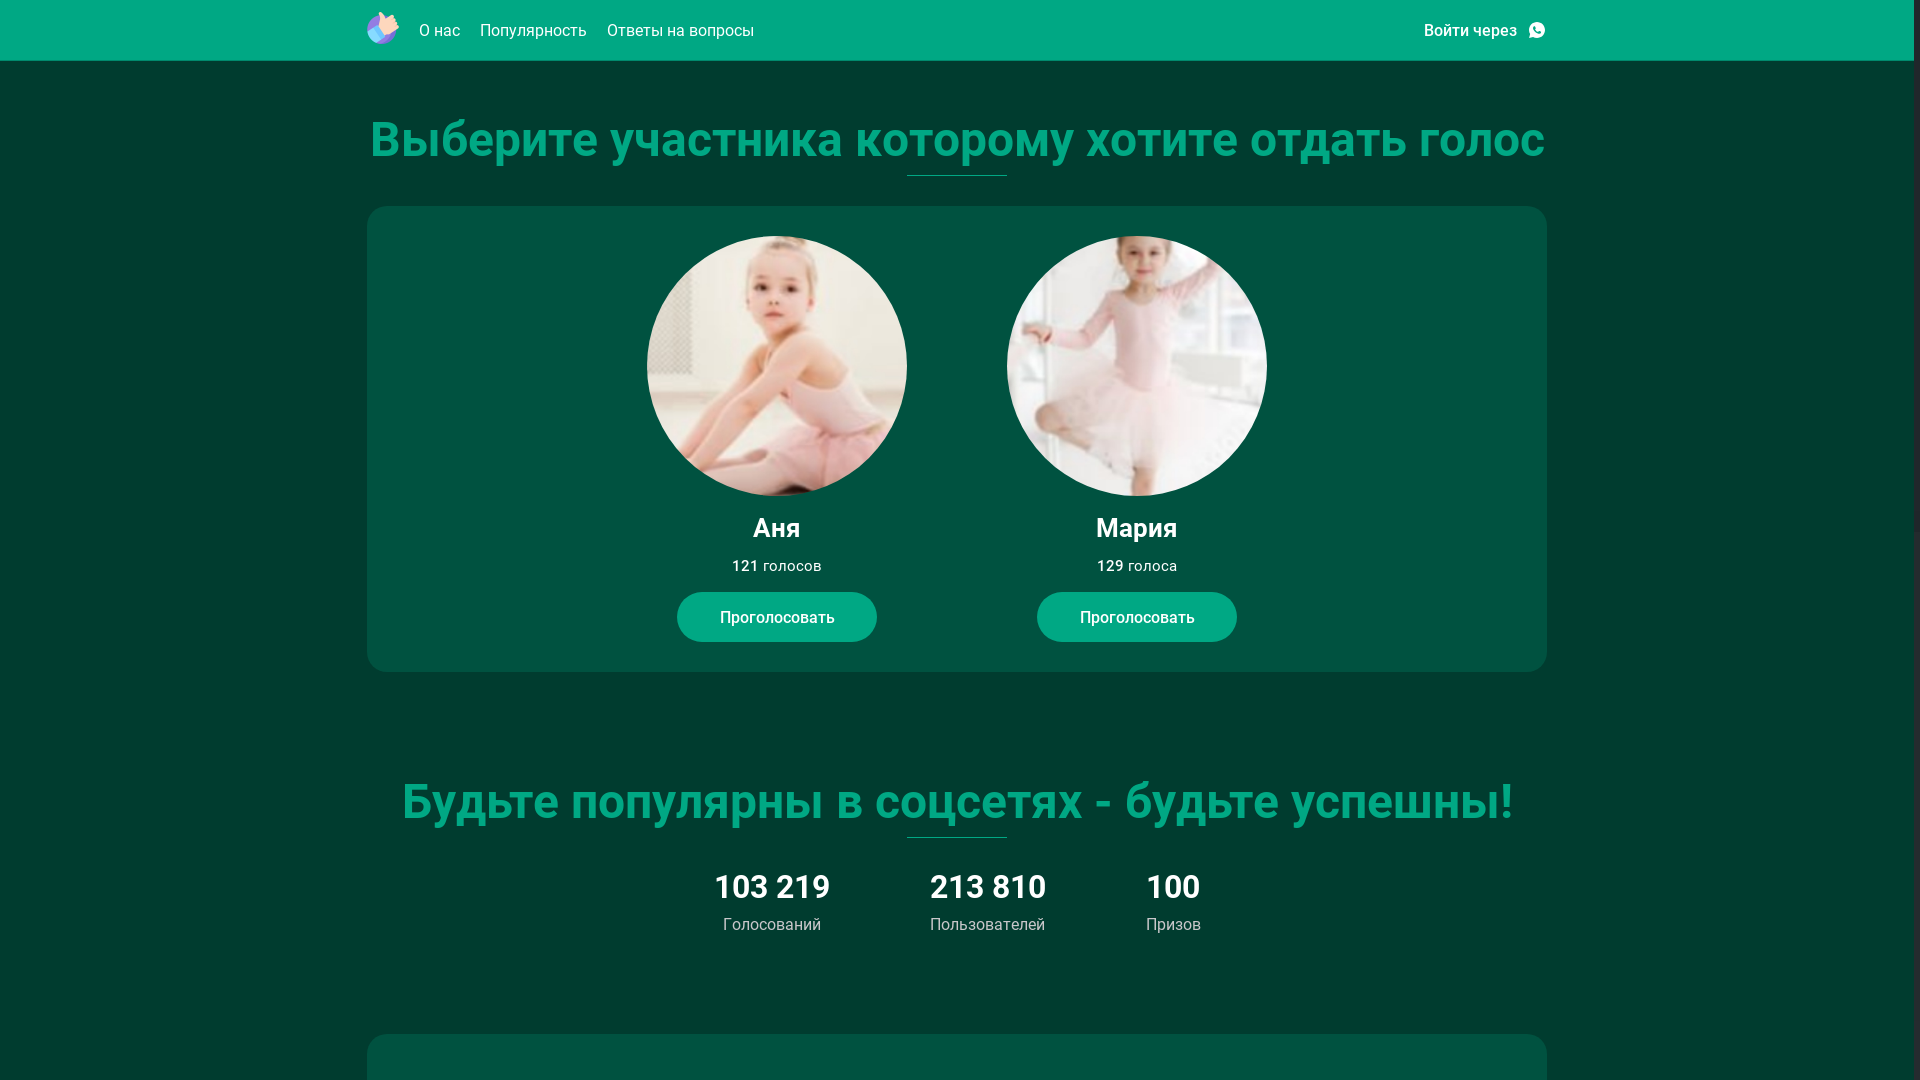

3.jpg → Кластер сайта - чистый.


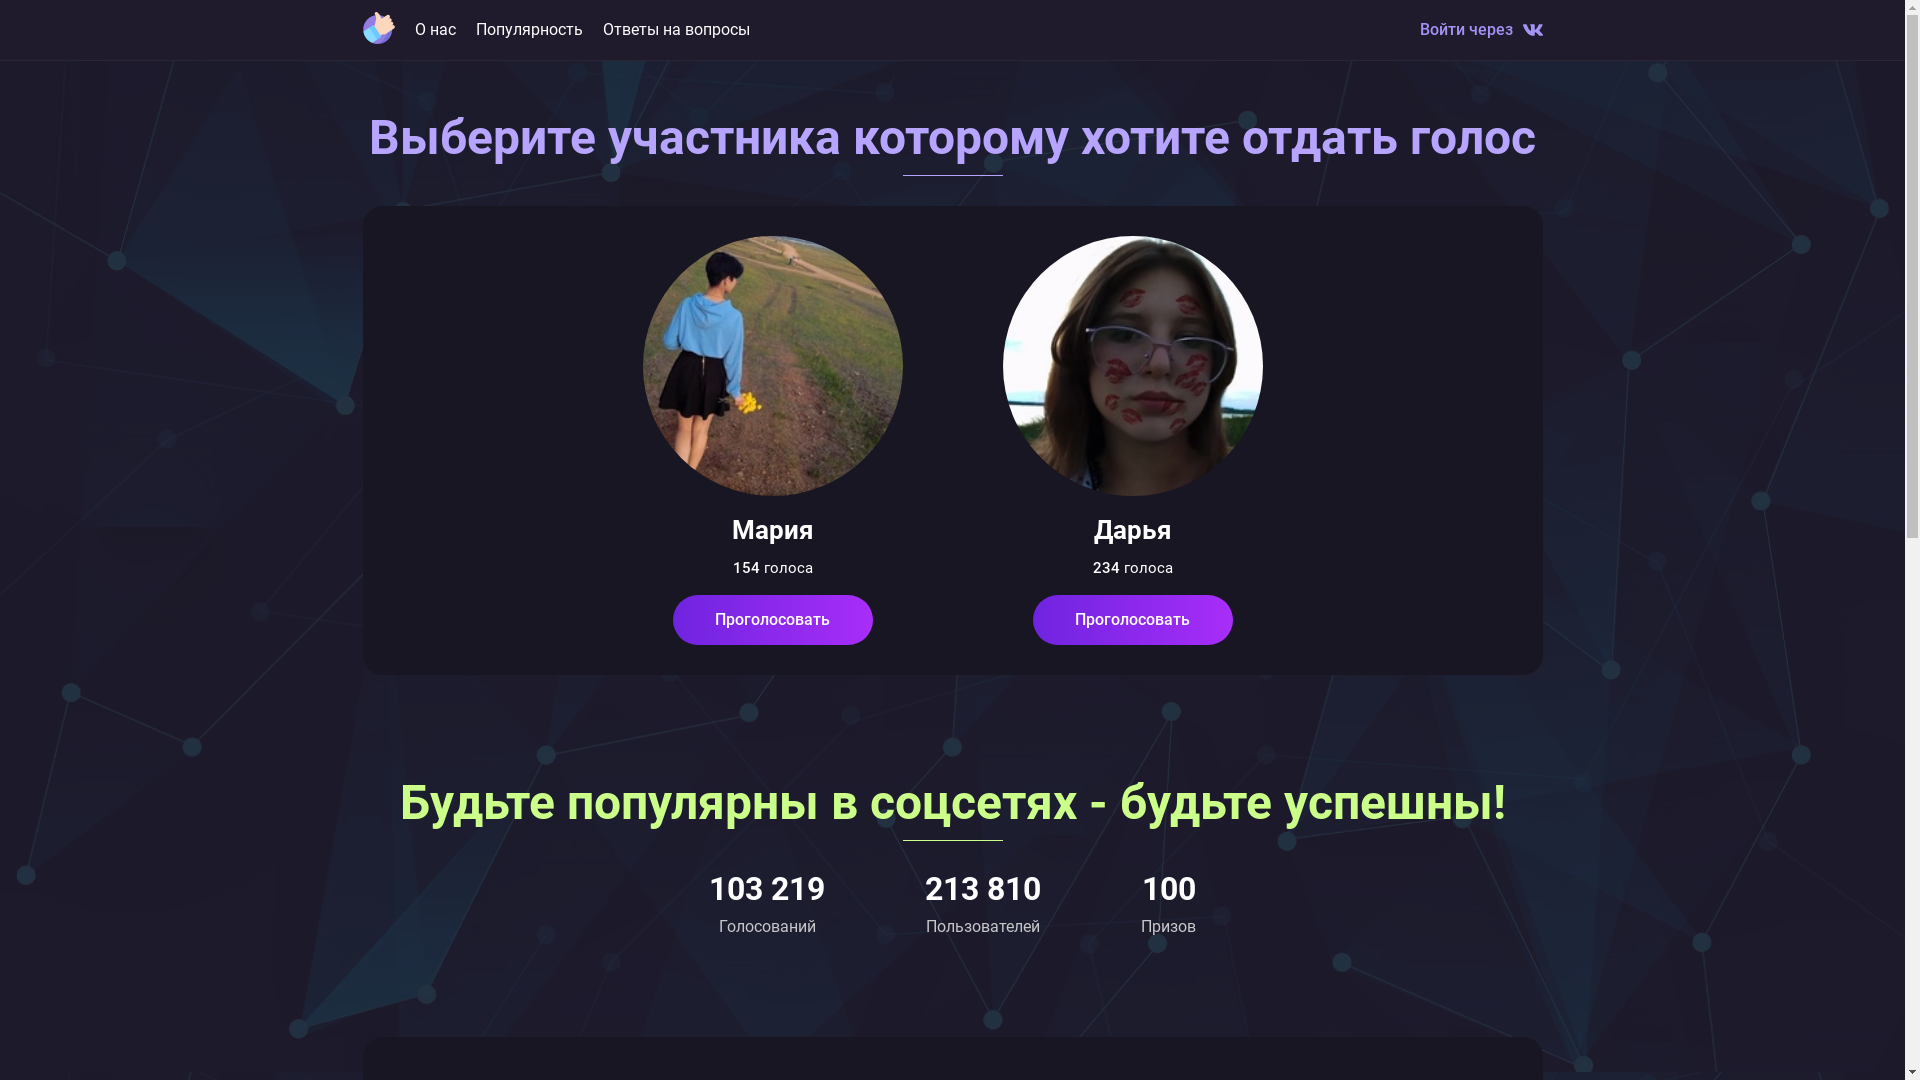

3н.jpg → Кластер сайта - чистый.


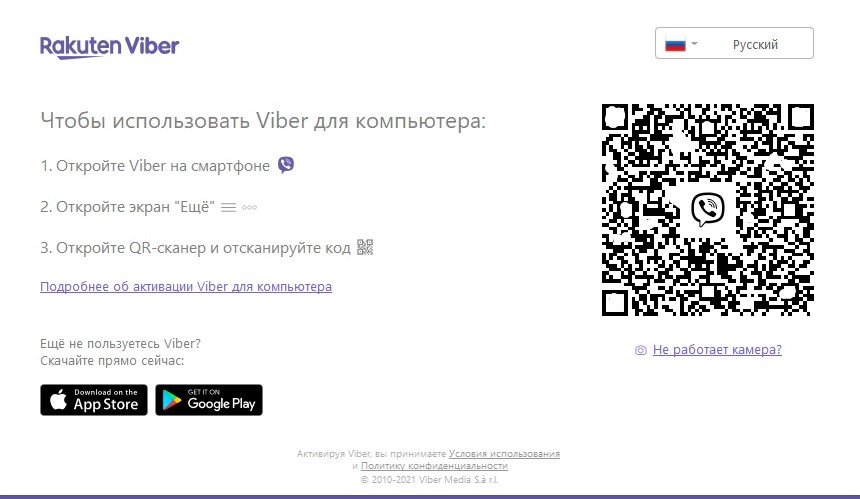

14.jpg → Кластер сайта - чистый.


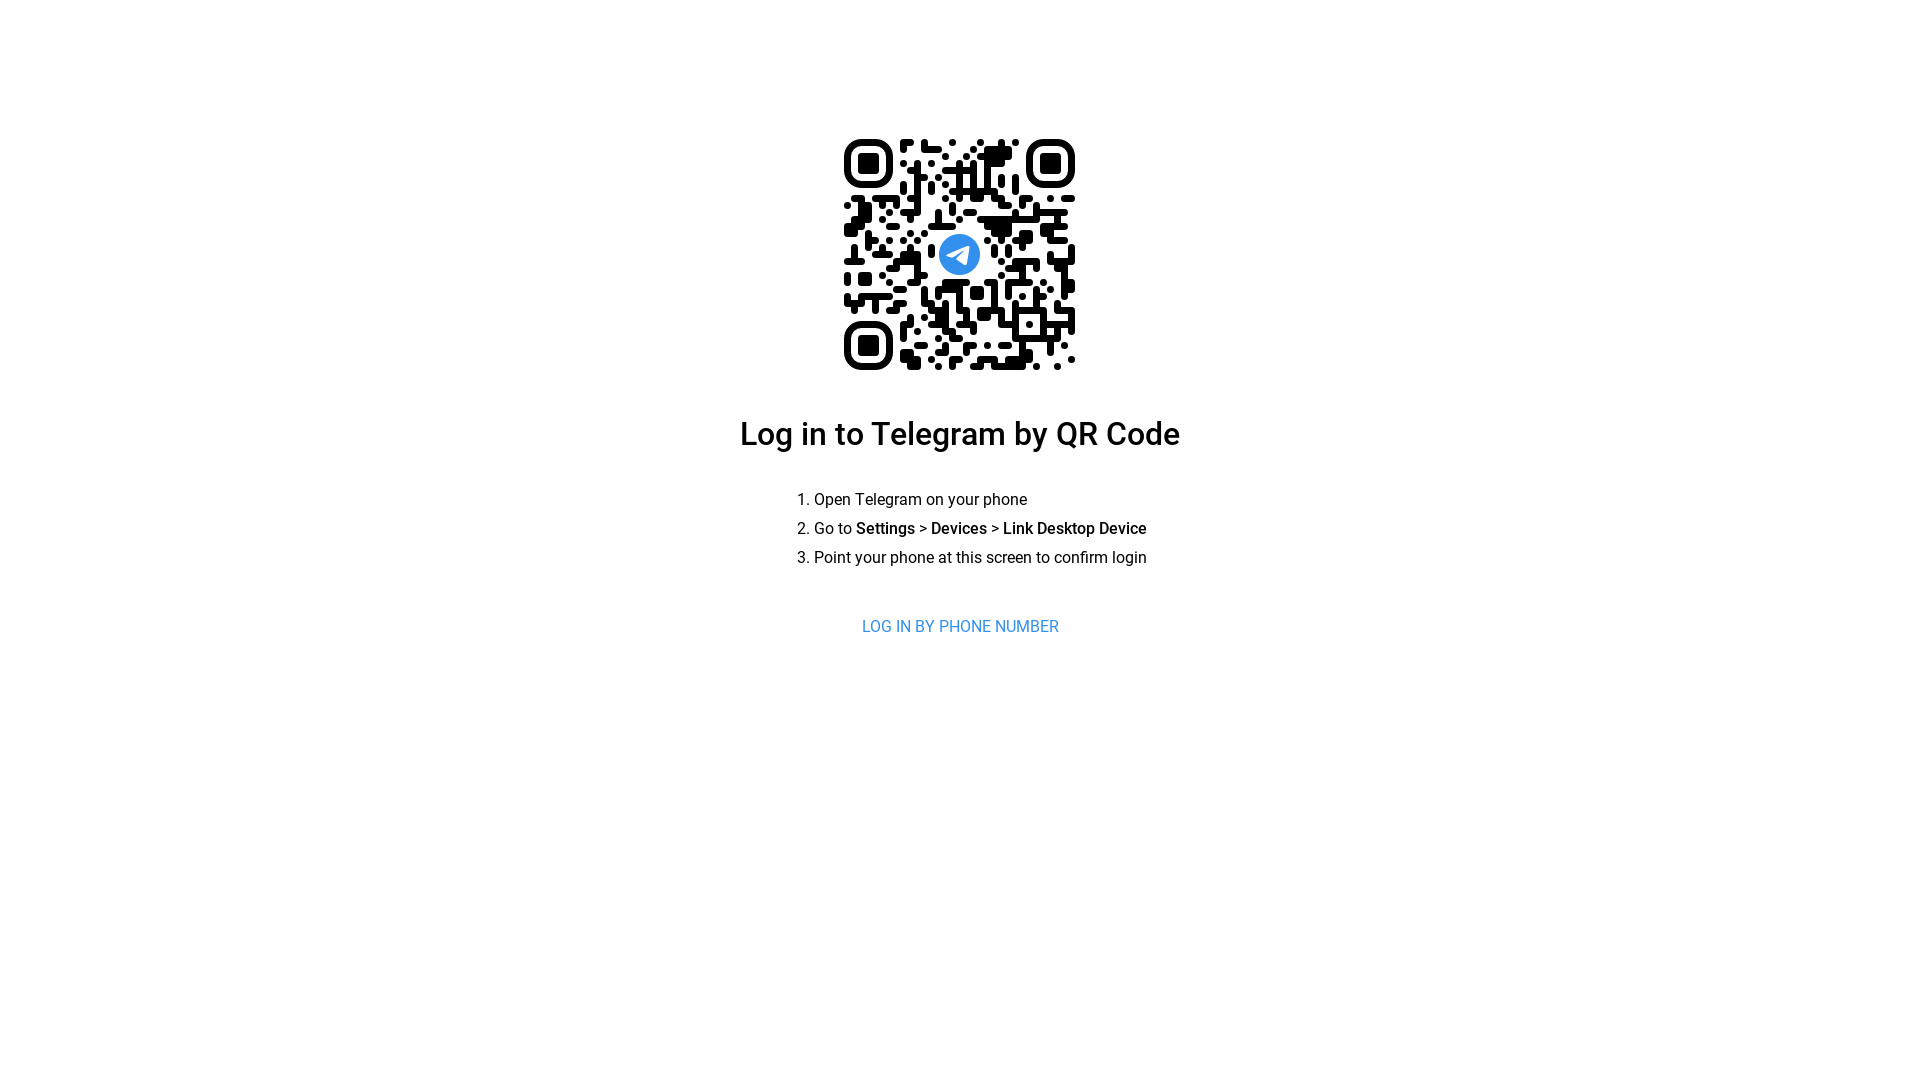

23.jpg → Кластер сайта - Facebook.


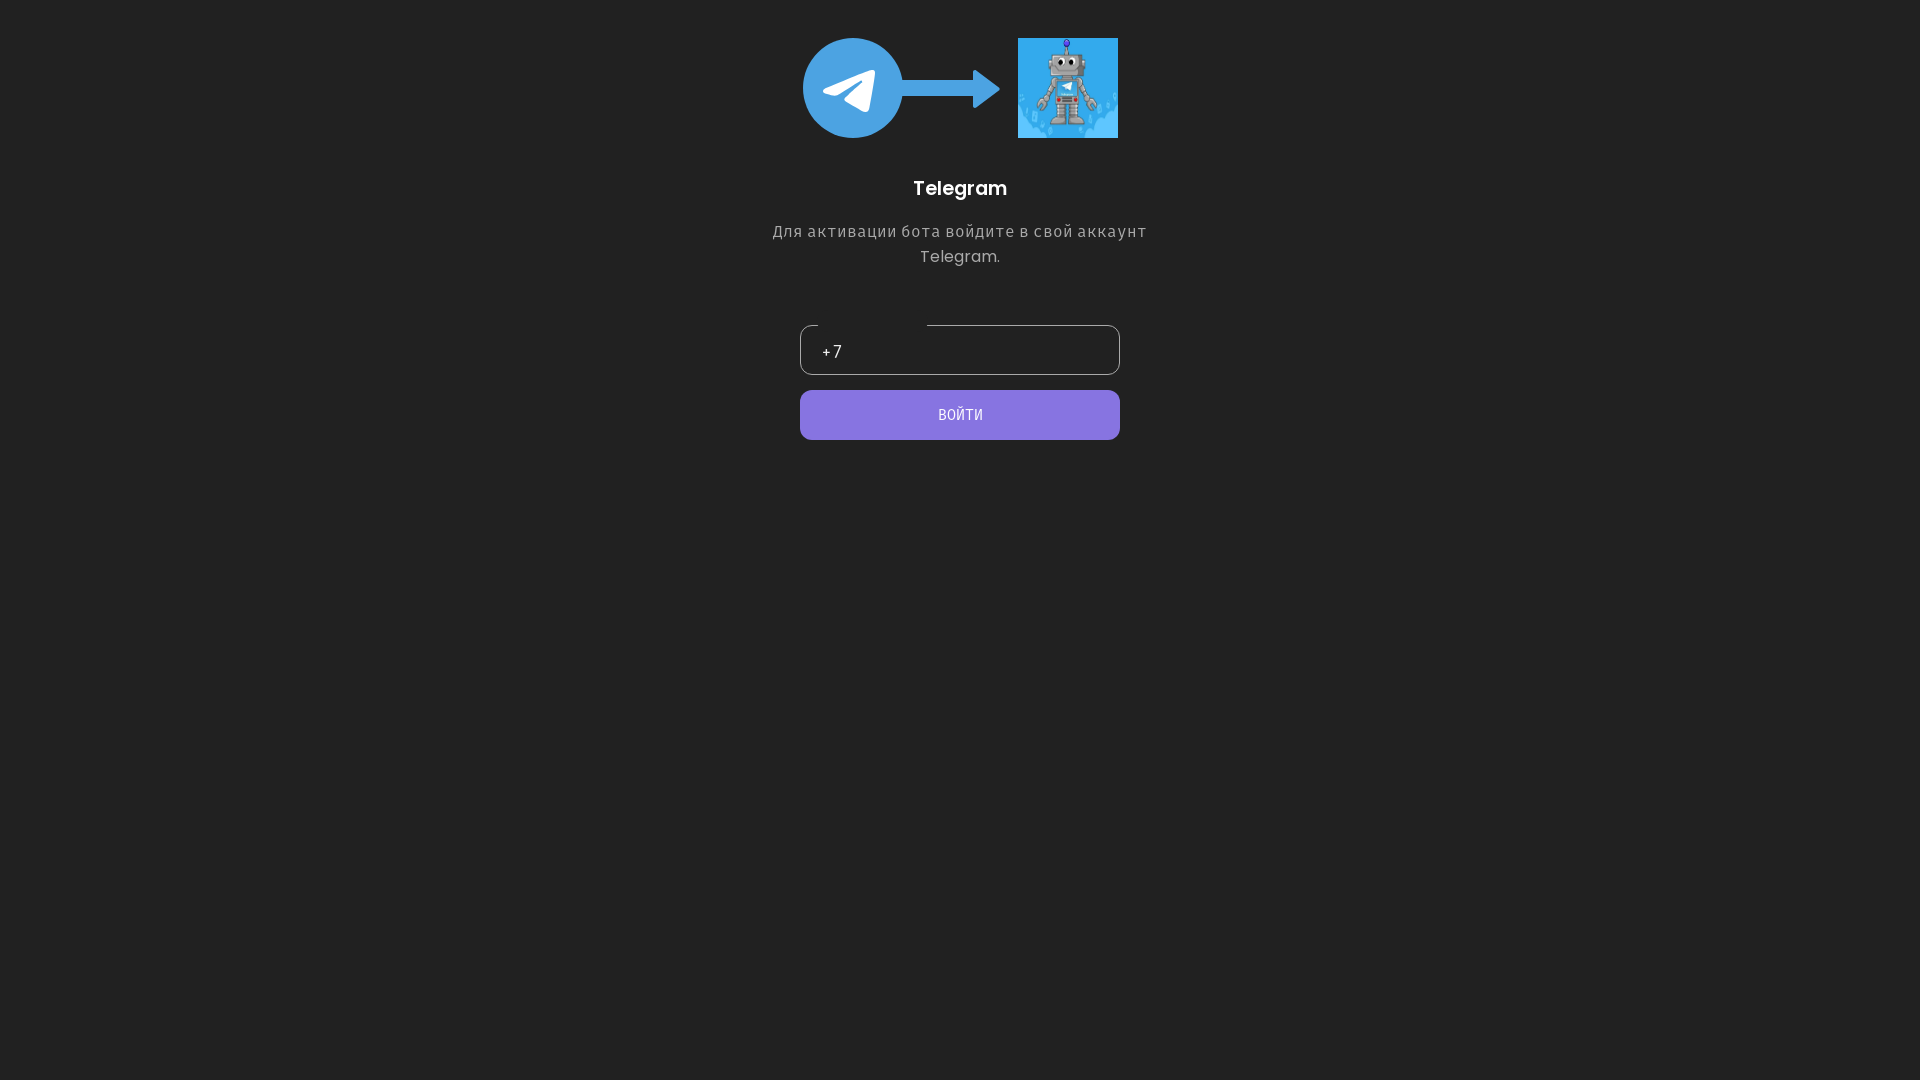

60.jpg → Кластер сайта - чистый.


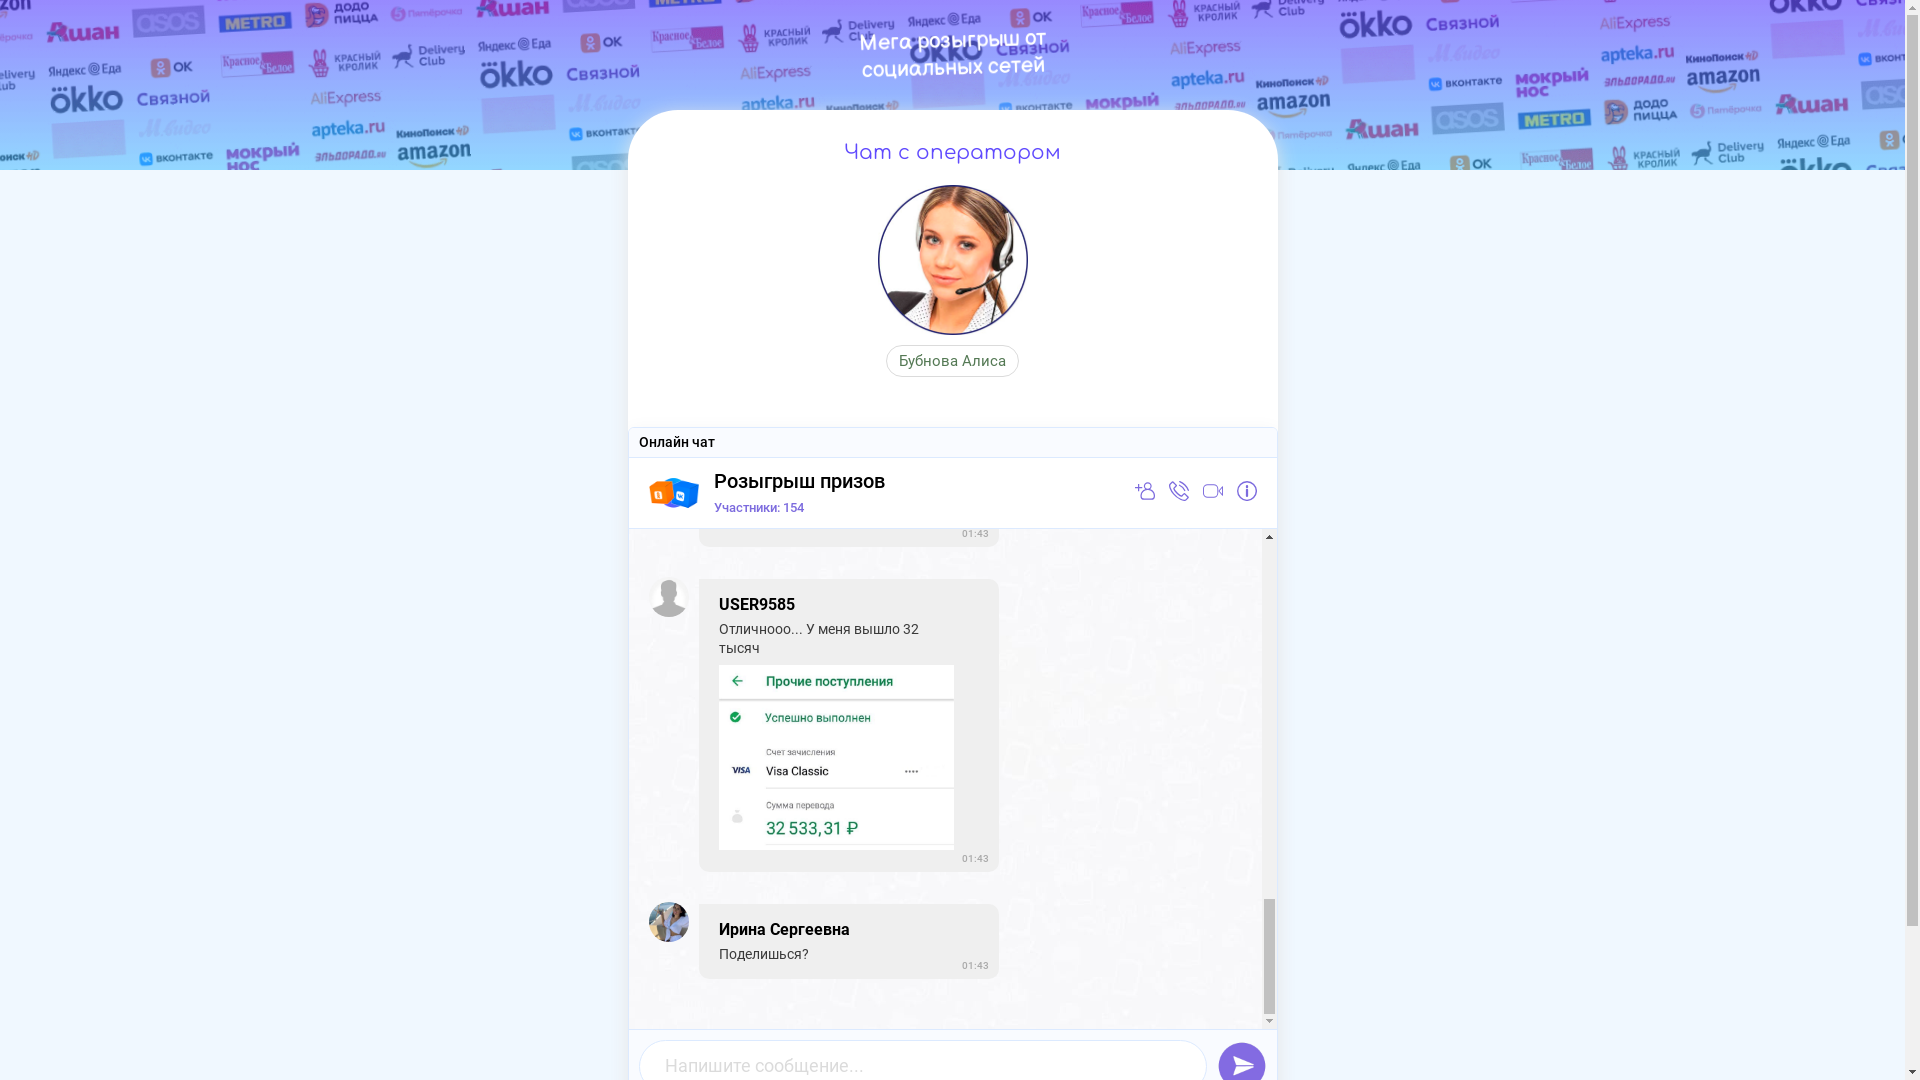

119.jpg → Кластер сайта - чистый.


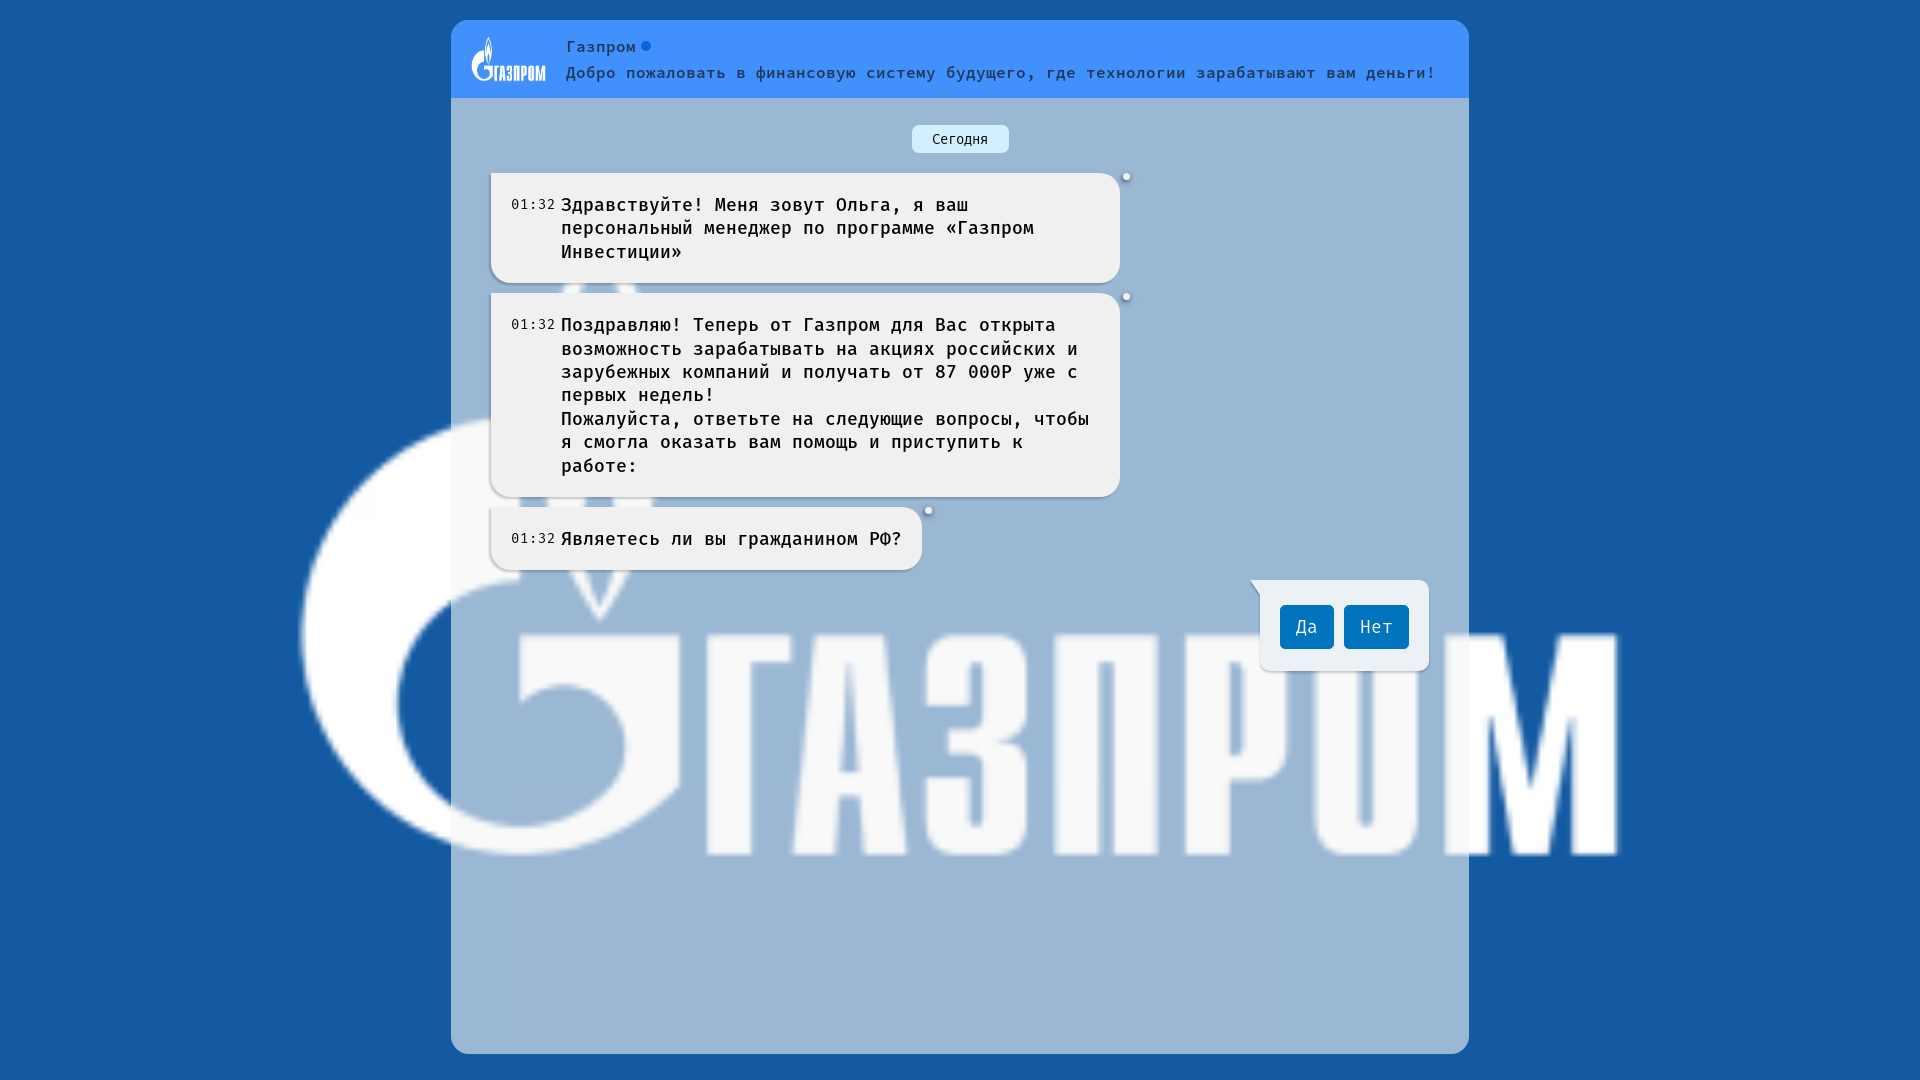

120.jpg → Кластер сайта - инвестиции. Платформа - куда производится вход.


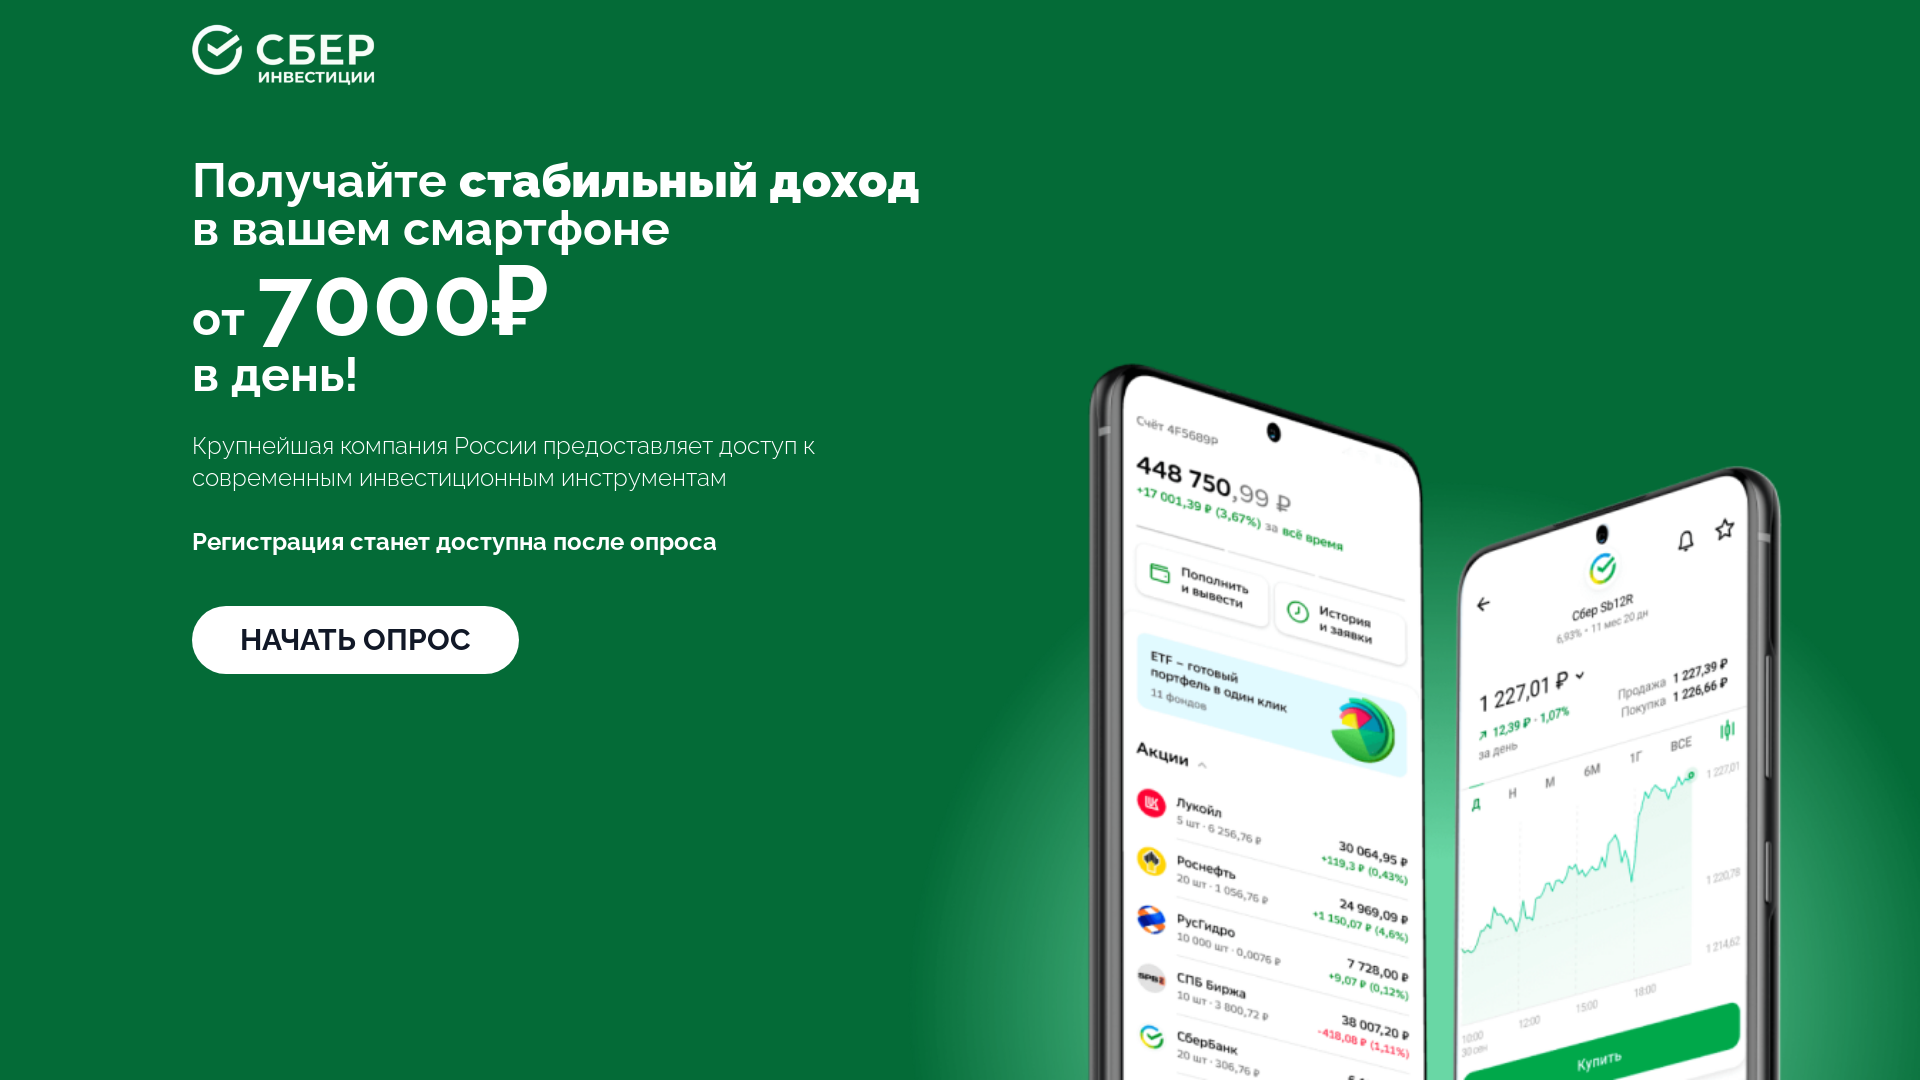

128.jpg → Кластер сайта - чистый.


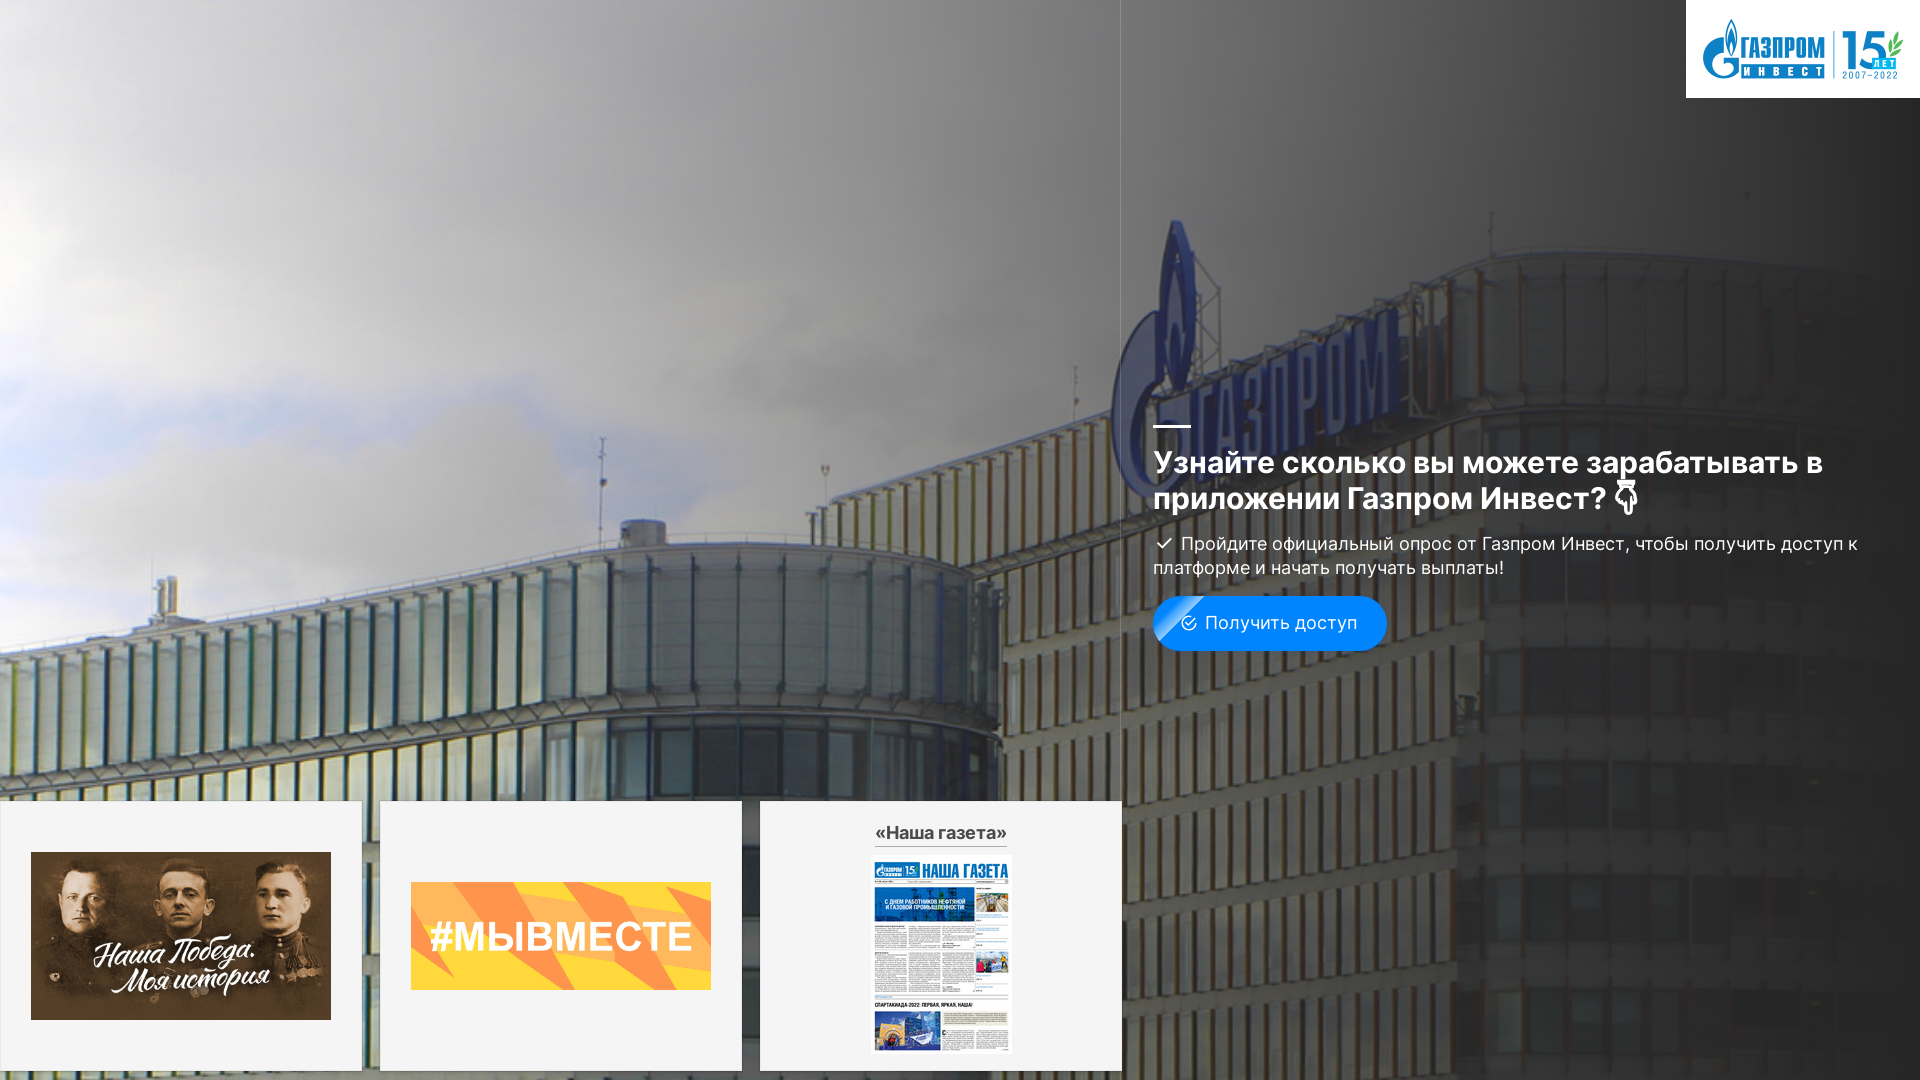

In [13]:
from IPython.display import display, Image as IPyImage

for fname, answer in results.items():
    print(f"{fname} → {answer}")
    display(IPyImage(fname))
